<a href="https://colab.research.google.com/github/lariskelmer/master-s-degree/blob/main/Vis%C3%A3o%20Computacional/CV02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Imagens

Do ponto de vista de implementação de um processo de classificação de imagens, é inviável pensar em escrever um código puramente procedural (com estruturas de controle e regras de se-então) para determinar se uma imagem é de uma determinada classe ou não.

A abordagem mais comum é utilizar algo orientado a dados fornecendo imagens como exemplos de como categoria "se parece". A partir disso, um algoritmo pode ensinar a máquina e criar um modelo capaz de reconhecer a diferença entre as categorias.

Como estamos no contexto de aprendizado supervisionado, o nosso conjunto de exemplos deve conter, pelo menos, dois elementos:

* imagem
* categoria/rótulo da imagem

## Pipeline de classificação

Diante do que foi dito, temos cinco passos básicos a serem adotados para realizar classificação de imagens:

1. estruturar o conjunto de dados inicial;
2. dividir o conjunto de dados em dois (ou três) partes;
3. extrair características;
4. treinar um classificador;
5. avaliar o classificador.

Vamos passar por cada uma dessas etapas a seguir.


Para fins de exemplificação, serão utilizados o algoritmo de classificação $k$-Nearest Neighbor ($k$-NN) e a base de dados MNIST(http://yann.lecun.com/exdb/mnist/).


##$k$-NN

Como classificador escolhido, vamos ver uma pequena apresentação do algoritmo $k$-NN (https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). 

Sem dúvida, o algoritmos $k$-Nearest Neighbor é um dos mais simples classificadores. Por essa simplicidade, costuma ser o primeiro modelo a ser estudado pelas pessoas que ingressam na área de Aprendizado de Máquina. Apesar de simples, o algoritmo pode entregar resultados satisfatórios para uma boa classe de problemas.

De maneira simples, o $k$-NN classifica os dados de entrada buscando as classes dos pontos mais próximos (vizinhos). Na prática, cada ponto vixinho "vota" informando sua classe e aquela classe que tiver mais "votos" é escolhida para o novo dado de entrada.

O algoritmos parte do pressuposto que estão em um mesmo local no espaço de características compartilham uma mesma classe. No contexto de visão computacional, são de uma mesma classe de imagens.

O algoritmo $k$-NN precisa medir proximidade com os demais pontos para encontrar seus vizinhos. A maneira mais comum é utilizar uma medida de distância e a distância euclidiana é aquela mais utilizada. Podemos definir a distância euclidiana como:

\begin{equation}
d(\textbf{p},\textbf{q}) = \sqrt{\sum_{i-1}^{N}(q_i - p_i)^2}
\end{equation}

em que $\textbf{p}$ e $\textbf{q}$ são pontos (vetores de dados) e $p_i$ e $q_i$ são os valores de cada uma $N$ dimensões desse vetor.

De forma visual, podemos notar na figura a seguir como é feita a decisão de classe de um novo ponto.

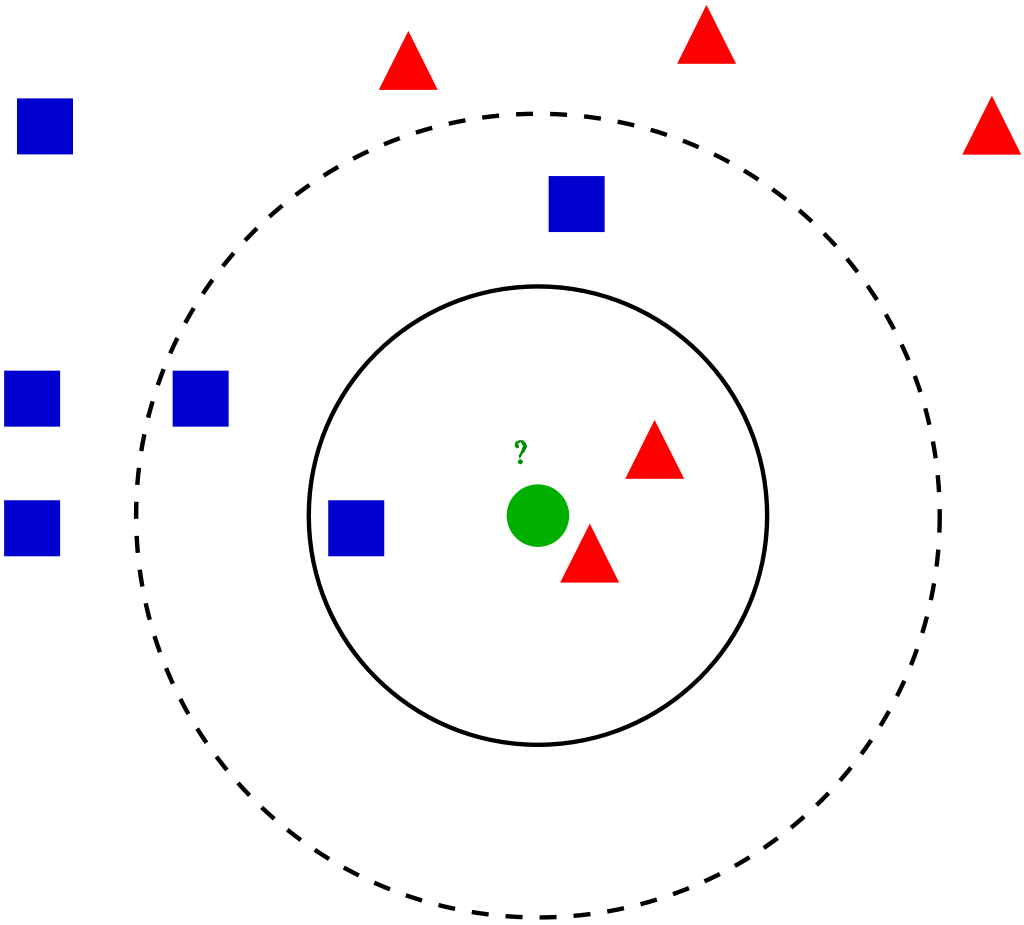


##MNIST 

A base de dados MNIST consiste de um conjunto de dígitos (0-9) manuscritos e é uma dos *benchmarks* mais utilizados no mundo para algoritmos de visão computacional.

A original possui 70.000 imagens. Mas, para tornar viável esse exemplo, vamos utilizar somente uma porção bem menor dela, com 1.797 exemplos, que é fornecida pela biblioteca *scikit-learn*.

Os dígitos na base são representados por um vetor de 64 características composto pela intensidade dos seus pixels. Nesse caso, as 64 dimensões do vetor correspondem a uma imagem $8\times8$ em escala de cinza, que foi achatada pelo *scikit-learn*. O fundo da imagem é preto (intensidade igual a 0) e a parte de interesse (dígito em si) tem valores referentes a tons de cinza.

# Estruturar base de dados

Nossa base de dados inicial possui 1.797 dígitos representando os números de 0 a 9. As imagens já passaram por um processamento robusto de alinhamento e centralização que vão facilitar nosso trabalho.

A primeira coisa a fazer antes de tratar a base em si, é importar as bibliotecas necessárias.

In [ ]:
# importar bibliotecas necessárias
#from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np
import imutils
import cv2
from google.colab.patches import cv2_imshow
import sklearn
from sklearn.model_selection import train_test_split

Após isso, vamos carregar a base de dados fornecida pelo *scikit-learning*.

In [ ]:
# Carregar a base MNIST
mnist = datasets.load_digits()

Se quisermos visualizar um pouco da base, podemos executar o código a seguir, que escolhe uma imagem aleatória do conjunto de dados e mostra essa imagem.

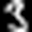

In [ ]:
i = np.random.randint(0,len(mnist.data))
image = mnist.data[i]
# como o dado já vem no formato de vetor, vamos converter para o formato de imagem
# 8 x 8.
image = image.reshape((8, 8)).astype("uint8")
# ajustando a escala de intensidade para melhor visualizar.
image = exposure.rescale_intensity(image, out_range=(0, 255))
# aumenta o tamanho da imagem com um redimensionamento para 32x32 para que 
# a gente possa enxergar melhor.
image = cv2.resize(image, (32,32), interpolation=cv2.INTER_CUBIC)
cv2_imshow(image)

# Dividir base de dados

De posse da base dados, precisamos dividir em duas partes (pelo menos): um conjunto de treino e um conjunto de teste.

O conjunto de treinamento é utilizado pelo classificador para aprender como cada categoria "se parece" fazendo predições e corrigindo quando as predições forem erradas.

Uma vez que o classificador esteja treinado, devemos avaliá-lo utilizando o conjunto de teste.

Vale salientar que é extremamente importante que os conjuntos de treinamento e teste sejam independentes entre si, ou seja, que não exista sobreposição entre eles.

As divisões mais comuns são:

* 66.7% (treinamento) 33.3% (teste)
* 75% (treinamento) 25% (teste)
* 80% (treinamento) 20% (teste)
* 90% (treinamento) 10% (teste)

Essa separação pode ser facilmente feita utilizando somente uma linha de código com os recursos da biblioteca `scikit-learn`. Basta chamar a função `train_test_split` e passar os dados, os rótulos e o percentual destinado ao conjunto de teste. Além disso, é possível configurar um valor base para o processo aleatório (*seed*), no caso de querer repetir o mesmo resultado futuramente.

In [ ]:
# dividir a base de dados em conjunto de treinamento e teste: 75% para treino e 
# 25% para teste
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.25, random_state=42)

### Hiperparâmetros e conjunto de validação

A grande maioria dos algoritmos de classificação possuem parâmetros a serem otimizados. O que costuma ser feito nesses casos é testar o algoritmo com vários valores diferentes dos parâmetros e utilizar a melhor configuração para nosso modelo final.

Como o conjunto de treinamento deve ser utilizado somente para a fase de treinamento, devemos criar um terceiro conjunto de dado: o conjunto de validação. Ele, normalmente, é extraído do próprio conjunto de treinamento, separando uma porção para fazer essa validação.

Note que o conjunto de validação funciona como o conjunto de teste, mas dentro do processo de encontrar o melhor valor para os parâmetros. Portanto, não deve existir sobreposição entre ele e o conjunto de treinamento.

Para isso, podemos alocar entre 10% e 20% do conjunto de treinamento para funcionar como validação.

Vamos utilizar a mesma função `train_test_split`, mas o conjunto de testes vai assumir o papel de conjunto de validação.

In [ ]:
# agora, vamos utilizar 10% do conjunto de treinamento para montar o conjunto de 
# validação
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

Podemos visulizar a seguir o tamanho que cada conjunto de dados ficou no final.

In [ ]:
# Mostra o tamanho de cada conjunto de dados
print("exemplos de treinamento: {}".format(len(trainLabels)))
print("exemplos de validação: {}".format(len(valLabels)))
print("exemplos de teste: {}".format(len(testLabels)))

exemplos de treinamento: 1212
exemplos de validação: 135
exemplos de teste: 450


# Extração de Características

Uma vez que os dados estejam definicos, precisamos extrair características das imagens para passar ao classificador. Esse passo pode acontecer antes da divisão dos dados sem prejuízos ao pipeline.

Existem muitas maneiras para extrair características dos dados:

* histograma de cores;
* histograma de gradientes orientados (HOG);
* padrões locais binários;
* etc.

Em alguns casos, a gente pode utilizar as próprias intensidades dos pixels como características, embora isso não seja muito comum e restrito a aplicações específicas.

Para o nosso exemplo corrente, é justamente o que vai acontecer, já que os dados (intensidades dos pixels em locais específicos) indicam características suficientes para distinguir entre um número de outros.

Portanto, os vetores de características para cada dígito é representado pelos valores de pixels em escala de cinza da imagem $8\times8$ "achatados" para ficar no formato $1\times8$.

# Treinamento

De posse dos vetores de características dos dados, podemos treinar o nosso classificador. O objetivo do classificador nesse ponto é aprender a reconhecer cada uma das categorias presentes no conjunto de rótulos.

A forma como cada algoritmo aprende depende da sua natureza. Por exemplo, Máquinas de Vetores de Suport (SVM) trabalham em um espaço de dimensão alta buscando um hiperplano de separação ótimo que separa as categorias. Árvores de Decisão e Florestas Aleatórias (*Random Forest*) buscam divisões ótimas dos dados baseados em entropia. 

Por outro lado, algoritmos simples como o $k$-NN não precisam realizar uma etapa de treinamento da mesma maneira. Na prática, o treinamento consiste em armazenar os dados, já que ele decide a classe de um novo exemplo a partir da distâncias para seus vizinhos mais próximos.

Esse algoritmo, apesar de simples, pode entregar resultados satisfatórios em algumas situações e, mais importante para o atual contexto, é simples de entender.

A seguir vamos ver como treinar e testar nosso $k$-NN para reconhecer os dígitos da base MNIST. Na verdade, vamos fazer além disso... vamos buscar qual a melhor configuração de parâmetro do $k$-NN que entrega o melhor resultado.

In [ ]:
# Inicializa os valores do único parâmetro a ser otimizado: o número de vizinhos (k).
kVals = range(1, 30, 2)
# Como vamos testar várias configurações, também é criado uma lista para armazenar esses valores.
accuracies = []


O que vamos fazer é treinar e testar o $k$-NN com vários valores de $k$ (vizinhos). Escolhemos verificar todos valores ímpares entre 1 e 30 (inclusos).

Em cada iteração, criamos um novo modelo $k$-NN com a função `KNeighorsClassifier` passando como único parâmetro o valor de $k$.

Após isso, o treinamento é realizado com a função `fit` do modelo que recebe os dados de treinamento e seus respectivos rótulos. 

A função `model.score` verifica qual o desempenho do modelo em termos de acurácia (acertos do modelo). Ou seja, utilizamos o conjundo de validação para testar o modelo que acabou de ser treinado. Para decidir mais na frente qual a melhor configuração, guardamos esse valor na lista `accuracies`.


In [ ]:
# loop com vários valores de k 
for k in range(1, 30, 2):
	# treina o k-NN com o valor atual de k. 
	model = KNeighborsClassifier(n_neighbors=k)
	model.fit(trainData, trainLabels)
	# avalia o modelo utilizando o conjunto de validação
	score = model.score(valData, valLabels)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
  # armazena o valor de acurária para o modelo atual.
	accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


A partir desse *loop*, temos condições de decidir qual a malhor configuração para eleger o melhor modelo a ser utilizado.

In [ ]:
# escolhe o valor de k que leva a melhor acurária.
i = int(np.argmax(accuracies))
print("k=%d levou a melhor acurácia de %.2f%% no conjunto de validação" % (kVals[i],
	accuracies[i] * 100))

k=1 levou a melhor acurácia de 99.26% no conjunto de validação


Note que vários valores levaram a acurárias iguais. Quando acontece isso, devemos escolher o valor que traz o menor custo computacional. Nesse caso, o valor de $k$ igual a 1 é o mais indicado, já que comparar a distância de um vizinho é bem menos custoso que comparar com 15.

# Avaliação

De posse da melhor configuração, vamos treinar o classificador "eleito" com os dados de treinamento e finalmente testá-lo com o conjunto de testes. Ou seja, essa é o desempenho definitivo do modelo gerado.

As funções utilizadas são basicamente as mesmas. A diferença principal está na utilização da `model.predict` ao invés de `model.score`. Nesse caso, estamos buscando, de fato, testar o modelo de forma mais completa e obter outros valores além da acurácia. A função `model.predict` faz isso por nós e permite que seja gerado um relatório com outras medidas de avaliação.

In [ ]:
# retreina o classificador utilizando o melhor valor de k.
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
# testa o modelo utilizando o conjunto de testes.
predictions = model.predict(testData)
# mostra o relatório final de classificação dando valores além da acurácia e 
# separados por classe.
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      0.98      0.98        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      0.98      0.99        41
           8       0.97      0.95      0.96        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Com esse relatório, temos medidas de precisão, revocação (https://en.wikipedia.org/wiki/Precision_and_recall) e f1 (https://en.wikipedia.org/wiki/F-score), além da quantidade de entradas classificadas dentro daquela classe. Essas medidas são extramemente úteis para avaliar mais detalhadamente o modelo. A acurácia nos dá uma visão mais ampla do modelo e que pode ser enganosa em algumas situações. 

Com esse nível de detalhamento, podemos ver em quais classes nosso modelo tem mais dificuldade e, caso desejado, tomar ações mais direcionadas.

## Teste manual

Podemos fazer um teste manual e visualizar os resultados. Nesse caso, vamos pegar algumas imagens aleatoriamente do conjunto de testes e pedir para o modelo predizer quais seriam esses dígitos. 

A predição foi: 6


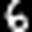

A predição foi: 7


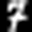

A predição foi: 2


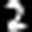

A predição foi: 7


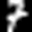

A predição foi: 6


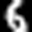

In [ ]:
# loop para selecionar algumas imagens aleatórias.
for i in list(map(int, np.random.randint(0, high=len(testLabels), size=(5,)))):
	# pega a imagem e classifica utilizando o modelo.
	image = testData[i]
	prediction = model.predict(image.reshape(1, -1))[0]
  # converte a imagem para um array 8 x 8 para ser compatível com o OpenCV e permitir
  # a visualização.
	image = image.reshape((8, 8)).astype("uint8")
	image = exposure.rescale_intensity(image, out_range=(0, 255))
  # aumenta o tamanho da imagem com um redimensionamento para 32x32 para que 
  # a gente possa enxergar melhor.
	image = cv2.resize(image, (32,32), interpolation=cv2.INTER_CUBIC)
	# mostra a predição do classificador.
	print("A predição foi: {}".format(prediction))
	cv2_imshow(image)

# Considerações

Conseguimos uma acurária extraordinária (98%) para esse problema. Mas, algumas considerações precisam ser feitas. Em geral, os problemas de reconhecimento de escrita são mais complexos porque o cenário real é mais caótico e o trabalho de pré-processamento é fundamental para o sucesso.

Utilizamos o algoritmos $k$-NN como modelo de treinamento. Ele é extremamente simples e pode entregar resulatdos plausíveis. No entanto, sua complexidade é linear, $O(N)$, o que o torna impeditivo se o conjunto de dados for muito grande. 

Isso mostra que o trabalho de visão computacional aliado ao aprendizado de máquina vai exigir conhecimento e escolhas a serem feitas. Em muitas situações, vamos querer simplicidade e respostas rápidas, enquanto que em outras, vamos precisar de precisão extrema mesmo que isso leve a custos computacionais elevados. 

Somente com experiência e estudo é possível adquirir habilidade para fazer essas escolhas da melhor maneira possível.